# Project 1: House Prices - Advanced Regression/Feature Engineering Techniques

### Brief Project Description

In this project, we are focusing on feature engineering and advanced regression techniques. First, for our attempt at feature engineering, that means we explore and discuss different methods to handle outliers and missing values, both in categorical and numeric columns. Second, when we refer to advanced regression techniques, we apply different regression algorithms such as a RandomForestRegressor and later compare the results we received.

The dataset that we are using throughout this project together with a detailed descrption can be found here: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings("ignore")

## Data Import and first Inspection

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Explanatory Data Analysis

### Check Dataframe for Duplicates

In [6]:
df.duplicated().sum()

0

### Check Dataframe for Missing Values

In [7]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [8]:
# Detect the number of missing values in the columns
col_missing_values =[index for index in df.isnull().sum().index if df[index].isnull().sum()>0]

# Print them out
print(f'We have {len(col_missing_values )} columuns with missing values. Those columns are: ', col_missing_values) 

# Print out the number of missing values for each column
df.isnull().sum().sort_values(ascending=False)

We have 19 columuns with missing values. Those columns are:  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### Numeric Variables

First, we take a deeper look into our numeric variables.

In [9]:
# Display the numeric variables of the dataframe
df.select_dtypes(exclude='object').head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# Display some basic properties of the numeric variables of the dataframe
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [11]:
# Detect the number of missing values in the numeric columns
num_cols_missing_vals = [index for index in df.select_dtypes(exclude='object').isnull().sum().index if 
df.select_dtypes(exclude='object')[index].isnull().sum() > 0]

# Print them out
print(f'We have {len(num_cols_missing_vals)} columuns with missing values. Those columns are: ', num_cols_missing_vals)

# Print out the number of missing values for each column
print('Number of missing values for each column: \n')
df[num_cols_missing_vals].isnull().sum()

We have 3 columuns with missing values. Those columns are:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Number of missing values for each column: 



LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### Distribution of the Numeric Variables

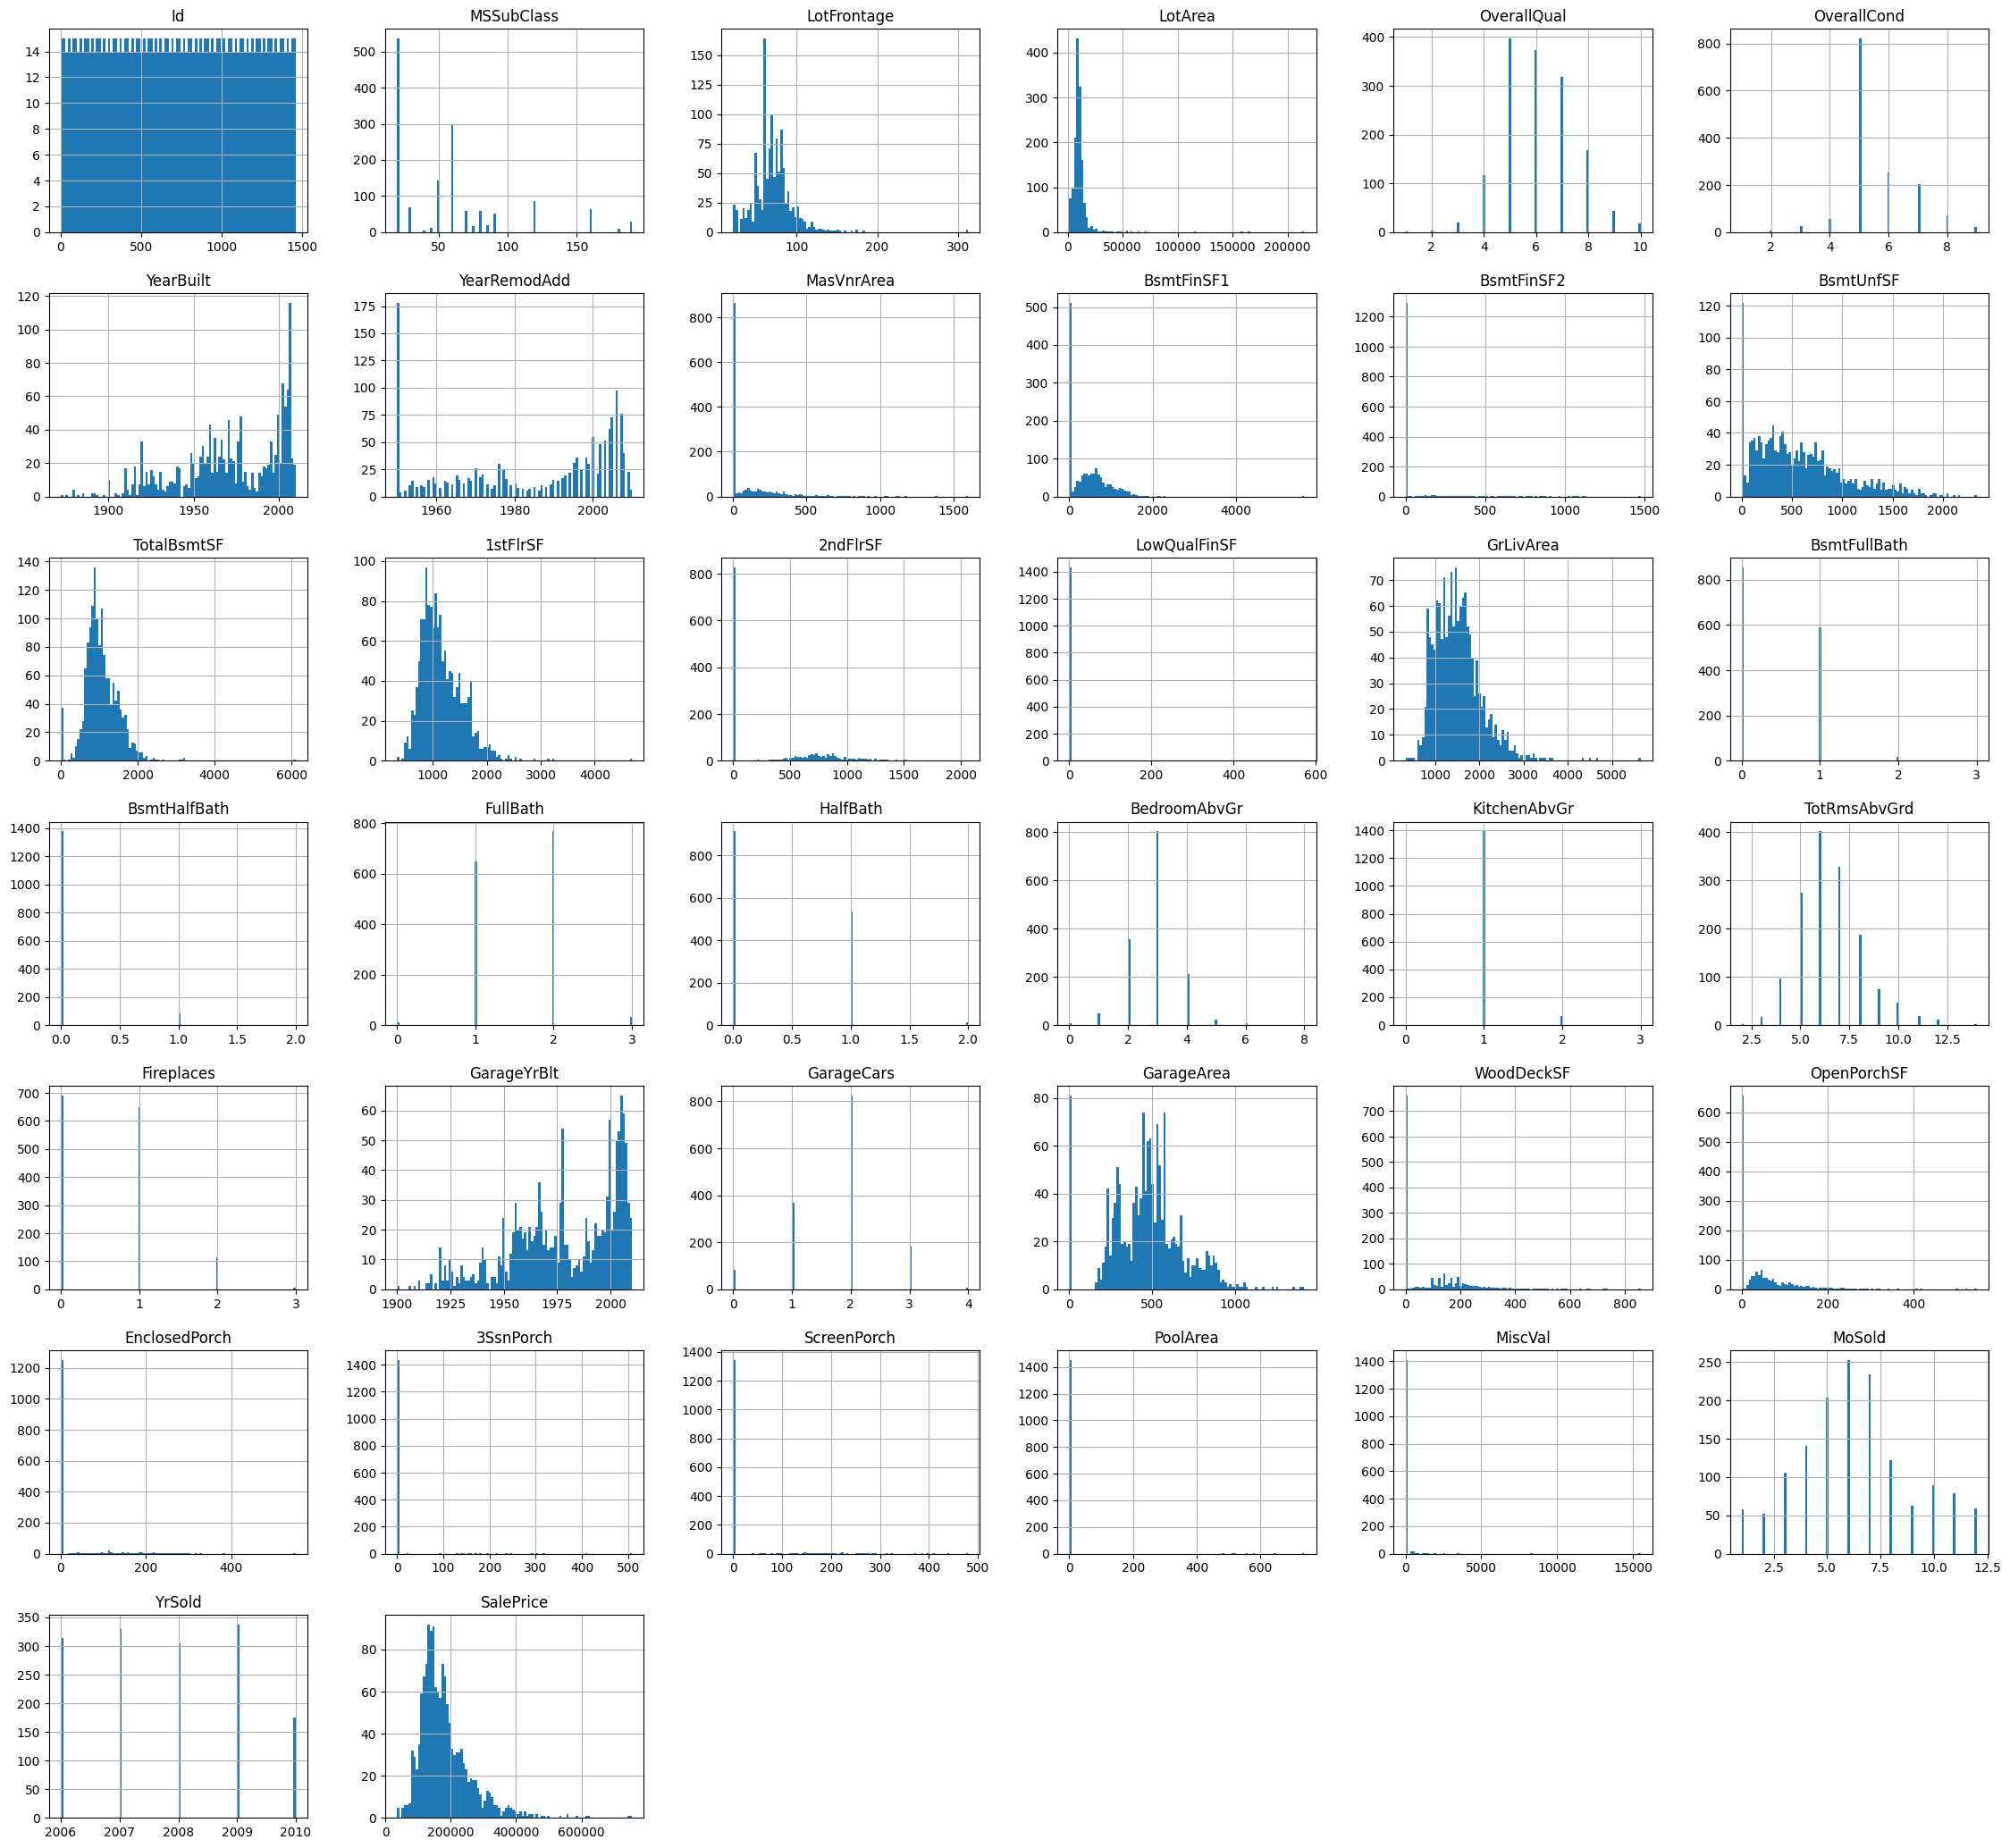

In [12]:
# Display the distribution of the numeric variables
df.select_dtypes(exclude='object').hist(figsize = (28, 26), bins = 100)
plt.show()

### Distribution of the Target Variable

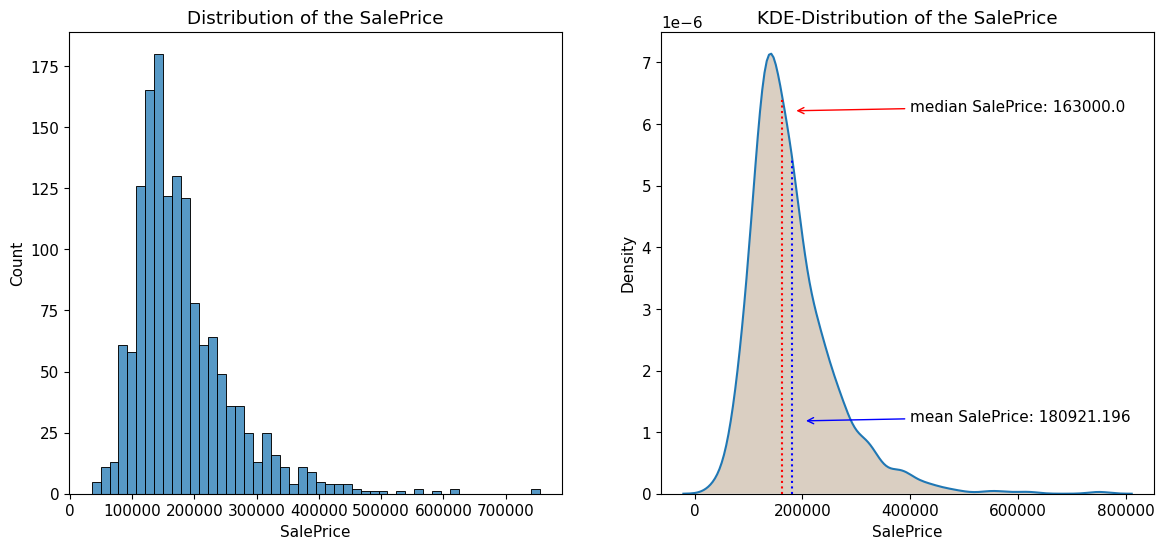

In [13]:
# Plot the target variable
plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 11})

# Plot a histogram for the distribution of the sales price
plt.subplot(1,2,1)
sns.histplot(data=df, x='SalePrice', bins=50)
plt.title('Distribution of the SalePrice')

# Plot a kde-plot for the distribution of the sales price
plt.subplot(1,2,2)
ax = sns.kdeplot(data=df, x='SalePrice')
plt.title('KDE-Distribution of the SalePrice')

# Get the x,y coordinates and the mean value
kdeline = ax.lines[0]

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

mean = df["SalePrice"].mean()

# Calculate the hight of the kde plot at the mean 
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color="blue", ls=':') 
ax.fill_between(xs, 0, ys, alpha=0.2) 
plt.xlabel('SalePrice')


# Annotate the kde-plot  
plt.annotate(
    'mean SalePrice: ' + str(np.round(df["SalePrice"].mean(),decimals=3)),
    xy=(df["SalePrice"].mean(), 1.17875320e-06 ),
    xytext=(400000, 1.17875320e-06 ),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10))

median = df["SalePrice"].median()


# Calculate the hight of the kde plot at the median
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color="red", ls=':')
ax.fill_between(xs, 0, ys, alpha=0.2)


# Annotate the kde-plot  
plt.annotate(
    'median SalePrice: ' + str(np.round(df["SalePrice"].median(),decimals=3)),
    xy=(df["SalePrice"].median(), 6.21191905e-06 ),
    xytext=(400000, 6.21191905e-06  ),
    arrowprops=dict(arrowstyle='->', color='red', shrinkB=10))

plt.show()


In [14]:
df.select_dtypes(exclude='object').isnull().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
dtype: int64

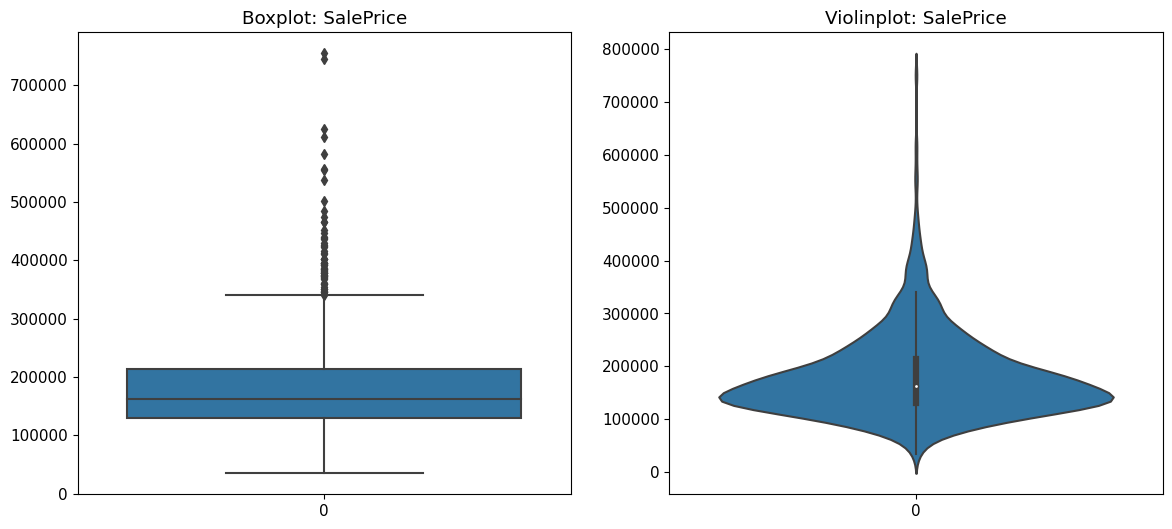

In [15]:
# Create a boxplot and a violineplot for the sales variable

plt.figure(figsize=(14,6))

# Create a boxplot
plt.subplot(1,2,1)
sns.boxplot(df['SalePrice'])
plt.title('Boxplot: SalePrice')

# Create a violine plot
plt.subplot(1,2,2)
sns.violinplot(df['SalePrice'])
plt.title('Violinplot: SalePrice')

plt.show()

### Correlation to the SalePrice Variable

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.Variables should be correlated with the target variable. For our further feature engineering or in fact feature selction it is good to know, which variables are strongly correlated to the SalePrice, our target variable, and which are not. This is, because we can drop columns that have no noticeable influence on the SalePrice.

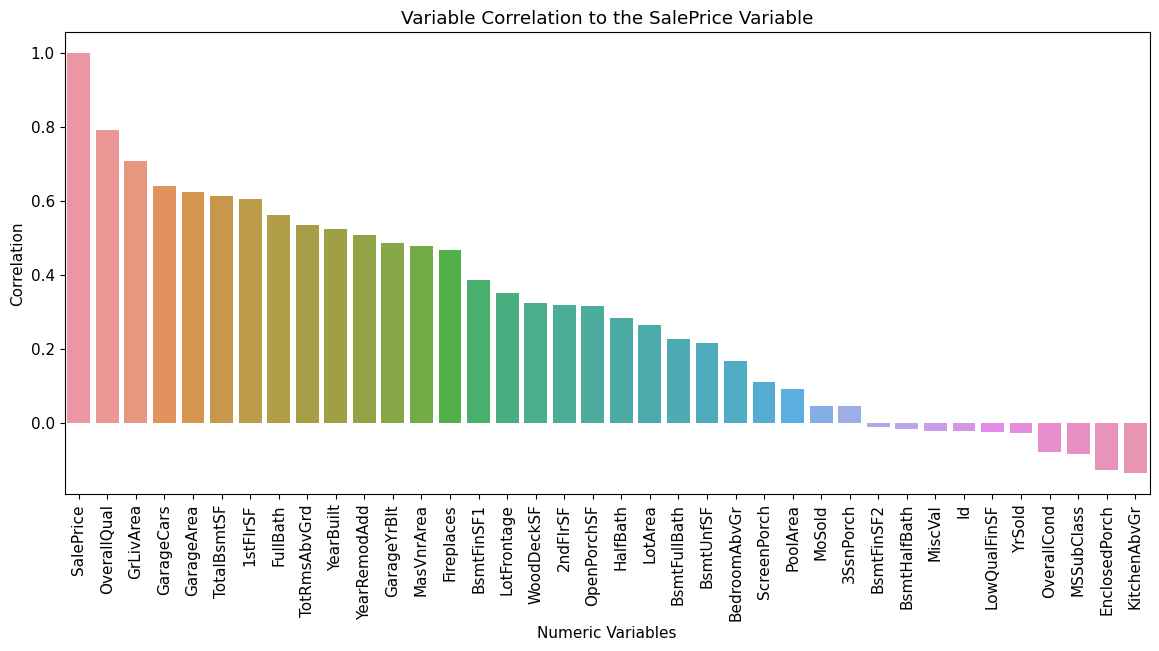

In [16]:
# Compute the correlations between the numeric columns and the sales variable
correlations = df.select_dtypes(exclude='object').corr()['SalePrice'].sort_values(ascending=False)

# Plot the correlation as a bar plot
plt.figure(figsize=(14,6))
sns.barplot(x=correlations.index, y= correlations.values) 
plt.xticks(rotation=90);
plt.title('Variable Correlation to the SalePrice Variable')
plt.xlabel('Numeric Variables')
plt.ylabel('Correlation')

plt.show()

### Categorical Variables

In [17]:
# Get all categorical variables
categorical = [column for column in df.columns if df[column].dtype=='object']

# Display them
df[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [19]:
# Create a dataframe for missing values in categorical columns
missingValues = pd.DataFrame({'column':[column for column in categorical], 
                              'number different of values': [len(df[column].unique()) for column in categorical]})

# Display the number different of values for each column
missingValues.sort_values('number different of values', ascending=False)

,column,number different of values
8,Neighborhood,25
16,Exterior2nd,16
15,Exterior1st,15
41,SaleType,9
9,Condition1,9
10,Condition2,8
12,HouseStyle,8
14,RoofMatl,8
25,BsmtFinType2,7
31,Functional,7


# Feature Engineering

This longer section is about feature engineering on our given houseprice dataset. As always in feature engineering our objective is to "process our raw data into processed data ready to be fed into a machine learning algorithm". For applying feature engineering we have different techniques on our disposal. Two of the main techniques are:
 * **Outlier Engineering**
 * **Handling with Missing Values**

Due to there different nature of numeric and categorical columns, we tackle the feature engineering of both in sepparate sections.

## Feature Enigineering on Numeric Variables

In [20]:
df_numeric = df.select_dtypes(exclude='object')

### Outlier Engineering 

Outliers are by definition values that are unusually high or unusually low respect to the rest of the observations of the variable. Outliers play an essential role in problems on imbalanced datasets. For instance, transactions in a fraud detection dataset are imbalanced. Moreover, the transactions deviating from the averages are more possibly the fraudulent ones. Hence, removing the outliers would again cause a loss of valuable information. 

The the outlier handling technique we apply to is outlier removal.

First, we try to detect outliers within the numeric variables. Therefore we use boxplots.

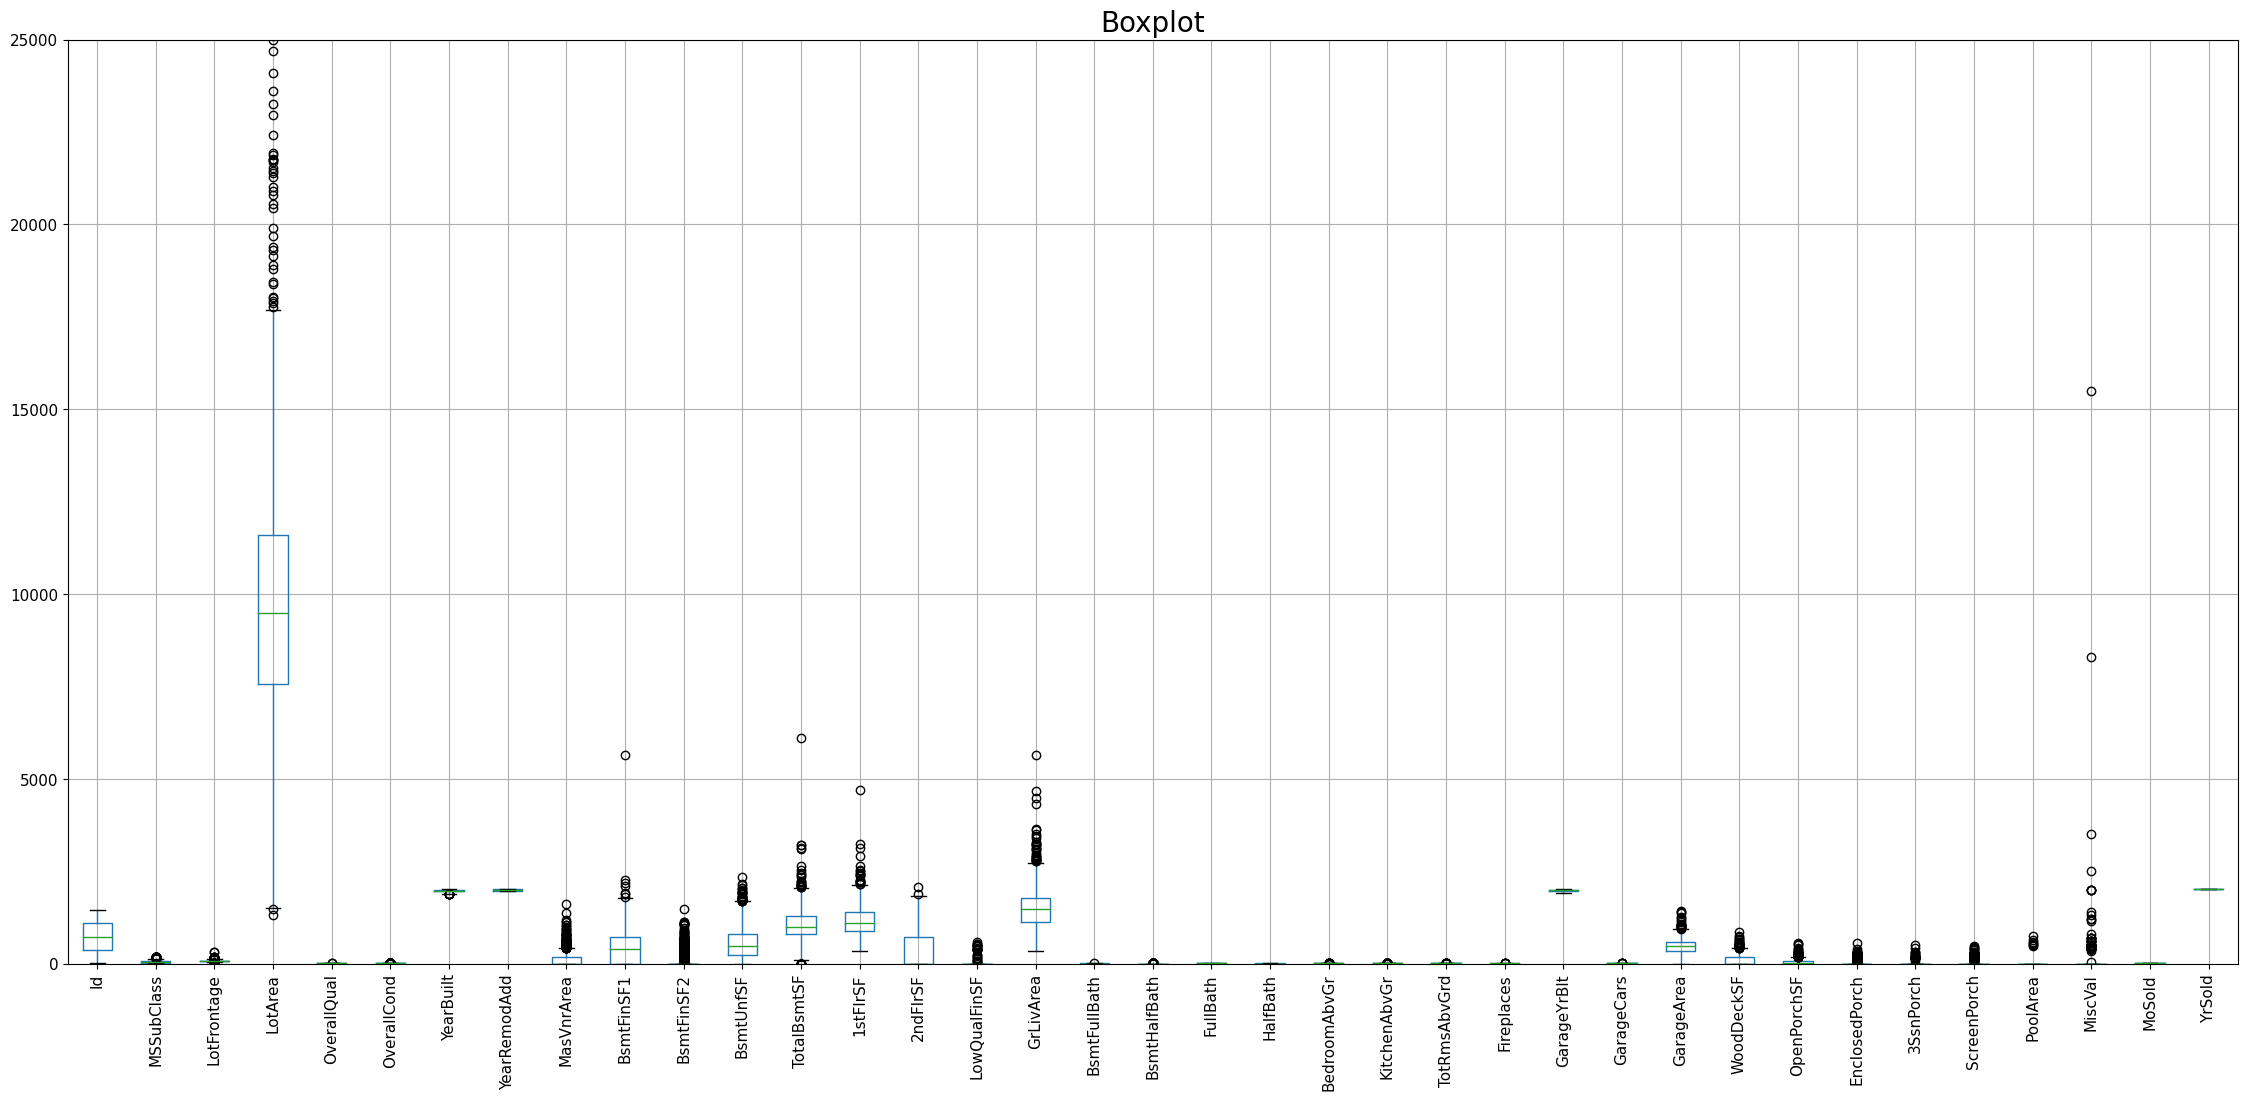

In [21]:
# Prepare the dataframe for plotting
df_numeric_without_target = df.select_dtypes(exclude='object').drop(["SalePrice"] , axis=1)

# Generate a boxplot for the detected outliers
plt.figure(figsize = (28, 12))
#plt.rcParams.update({'font.size': 16}) # must set in top
ax1 = df.select_dtypes(exclude='object').drop(["SalePrice"] , axis=1).boxplot(figsize = (28, 26))
ax1.set_xticklabels(df_numeric_without_target,rotation=90)
ax1.set_title('Boxplot',fontsize=20)

plt.ylim([0,25000])
plt.show()

As our the boxplot has shown before, we have several columns, that are containing outliers. To dectect and to remove them we should be cautious, that we don't drop to much rows. To take into acccount that, we dont want to drop to much rows, we try to constrain our outlier engineering only on columns that are strongly correlated with the target column.

First, we should take look on how many oustliers we have on each column.

To do so we calculate the quartiles as well as the IQR.

In [22]:
# Initialize the dicctionaries for storing the outlier bounds and the numbers of outliers
outlier_bounds = dict()
number_outliers = dict()

# Loop over the columns in correlations.index variable
for column in correlations.index:
    
    # Initialize a variable to store the computed bounds 
    bounds = []
    
    # Get first quartile (Q1) and  third quartile (Q3) for each column
    Q1 = df_numeric.describe()[column]['25%']
    Q3 = df_numeric.describe()[column]['75%']
    
    # Calculate the upper and lower bound for each column
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR 
    number_outliers[column] = ((df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR )).sum()
    bounds.append(lower_bound)
    bounds.append(upper_bound)
    
    # Fill the dicctionary with the calculated bounds
    outlier_bounds[column] = bounds

Now, let's have a look how much outliers we have in each column. 

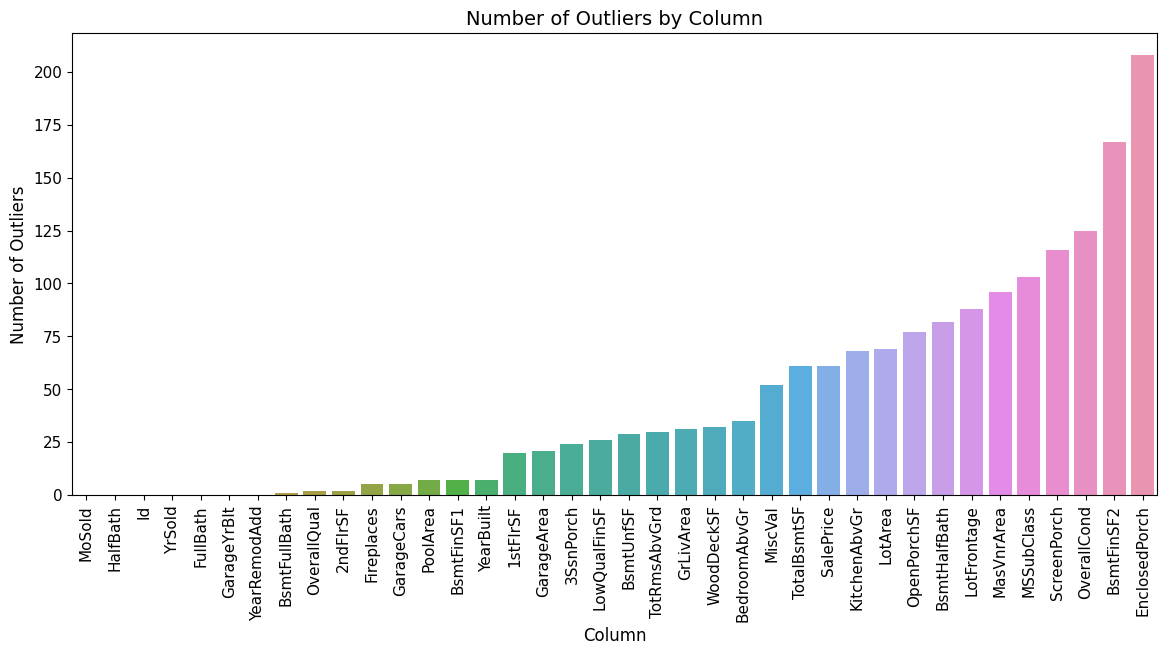

In [23]:
df_out = pd.Series(number_outliers).to_frame(name='Number of Outliers')
df_out = df_out.reset_index().reset_index()
df_out = df_out.sort_values(by='Number of Outliers')


# Create a barplot
plt.figure(figsize=(14,6))
sns.barplot(data= df_out, x='index', y='Number of Outliers')
plt.xticks(rotation=90)
plt.xlabel('Column', fontsize=12)
plt.ylabel('Number of Outliers', fontsize=12)
plt.title('Number of Outliers by Column', fontsize=14)
plt.show()

### Ellbow Method for Removing Outliers

Next, we look for a method to determine how we remove outliers in the best possible way. This, in particular, means a tradeoff between removing enough outliers so that our machine learning model doesn't yield unreliable results on the one hand, and sustaining enough rows on the other hand, so that our prediction remains valid.

A way to visualize this tradeoff is to plot it out graphically, so that we see the outlier removal in relation to the decrease of rows. As it was mentioned above, if we process our outlier removal, it makes sense to take into account the correlation of each column with the houseprice. So we embark on our outlier removal on coumns with the highest correlation values.

In [24]:
# Store the correlated values into an array with just two decimals
corr_values = np.round(correlations.values , decimals=2).astype('str')

# Convert the corr_values array to a list and put an empty string at the first place of the list
correlations_new = list(corr_values) 
correlations_new.insert(0, '')

# Convert the corr_values array to a list and put an empty string at the first place of the list
correlations_index = list(correlations.index) 
correlations_index.insert(0, '')

# Create a dicctionary that contains our correlation indexes as keyls and our correlation_values as values
new_dict = dict(zip(correlations_index, correlations_new))

# Create a new list of indexes, where we add the correlation value to the column name
new_index = []

for column in new_dict:
    if column=='':
        new_index.append(column)
    else:
        new_index.append(column + ': ' + new_dict[column])

In [25]:
# Define a list and insert the length of the original dataframe into the list.
len_df = [len(df)]

# Make a copy of our originaal dataframe, since we are changing 
df_new = df.copy()

# Iterate over the columns and 
for column in outlier_bounds:
    
    # Remove outliers
    df_new  = df_new[~((df_new[column]<outlier_bounds[column][0]) | (df_new[column]>outlier_bounds[column][1]))]
    
    # Keep track of the numbers of rows we loose by the outlier removal from that column
    len_df.append(len(df_new))   

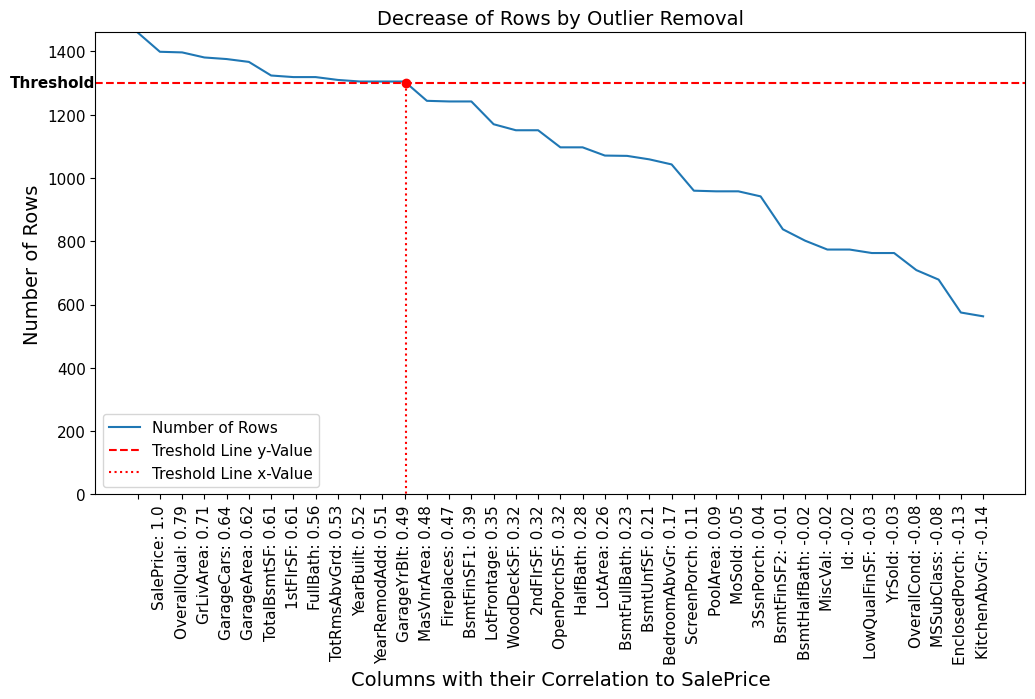

In [26]:
### Define a threshold that represents the mimimal length the data frame should have after the outlier removal

# Define a threshold
threshold = 1300

# Create a plot
plt.figure(figsize=(12,6))
plt.margins(y=0)
plt.plot(new_index, len_df, label='Number of Rows')
plt.title('Decrease of Rows by Outlier Removal', fontsize=14)
plt.xlabel('Columns with their Correlation to SalePrice',fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.xticks(rotation=90)
plt.axhline(y=threshold, color='r', linestyle='--', label='Treshold Line y-Value')


# Annotate the the threshold line
txt1=('Threshold')
x0,x1 = plt.gca().get_xlim()
plt.text(x0, threshold  , txt1, ha='right', va='center', fontweight='bold')


# Calulate the x-coorardinate of the intersection between the thresholdline
length_treshold = np.interp(threshold , len_df[::-1], np.linspace(0,38,len(len_df))[::-1])

# Calulate the intersection
plt.plot(length_treshold, threshold, 'o', color='red')
plt.vlines(length_treshold , threshold , 0, color="red", ls=':', label='Treshold Line x-Value')
plt.legend()
plt.show()

This graphic shows us, if we define a threshold of a certain number of remaing rows (1300), we just can include a certain number of columns, that high correlation to the salesprice column. It also allows us some flexibility to play around with different thresholds. 

In [27]:
# Number of columns we can include in the outlier removal
chosen_cols = correlations_index[:int(length_treshold)+1]

# Do the outlier removal for the choosen columns
for column in outlier_bounds:
    
    # Check if column is inside the chosen columns
    if column in chosen_cols:
        
        # # Do the outlier removal for the choosen columns
        df  = df[~((df[column]<outlier_bounds[column][0]) | (df[column]>outlier_bounds[column][1]))]

Now, we are done with our oulier removal.

## Feature Enigineering on Numeric Variables

### Missing Values in Numeric Variables

Let's turn to the question of how to handle missing values in numeric columns. To do so we need to now what columns are containing missing values

In [28]:
# Get those columns with missing values
num_columns_miss_vals = df_numeric.isnull().sum()[df_numeric.isnull().sum()>0]

# Initialize variable to store the correlation between the current variable and the sales price
corr_vals = []

for column in num_columns_miss_vals.index:
    corr_vals.append(correlations.loc[column])

# Create a dictionary, that reports number of missing values and the correlaation to sales price variable
df_num_miss = pd.DataFrame({"Number of Missing Values": num_columns_miss_vals.values, "Correlation to SalePrice": corr_vals })
df_num_miss.set_index(num_columns_miss_vals.index)

,Number of Missing Values,Correlation to SalePrice
LotFrontage,259,0.351799
MasVnrArea,8,0.477493
GarageYrBlt,81,0.486362


### Imputing Missing Values in Numeric Variables

When we impute the missing values for each column, we process as follows:
 * **First we will check the distribistion for each variable**
 * **If the distribution is normal or almost normal, we choice a mean imputation**
 * **If the distribution is skewed, we choice a median imputation**

### GarageYrBlt Column

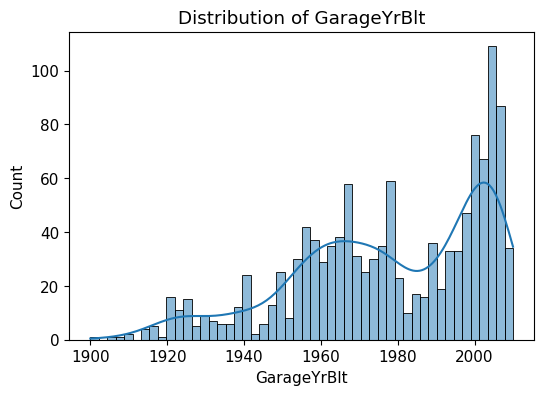

In [29]:
# Plot the distribution of GarageYrBlt variable.
plt.figure(figsize=(6,4))
plt.title('Distribution of GarageYrBlt')
sns.histplot(data=df, x='GarageYrBlt', bins=50, kde=True);

We can see that the GarageYrBlt distribution is skewed. So, we will use the median imputation.

In [30]:
# Median imputation
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

### MasVnrArea Column

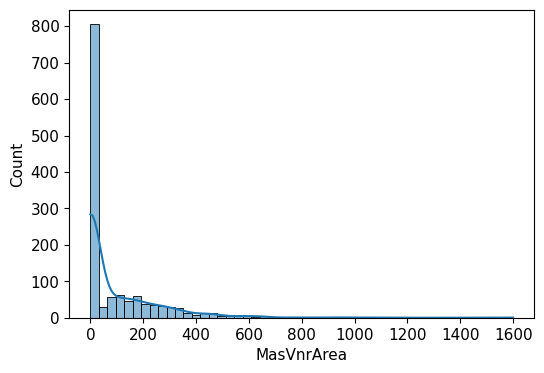

In [31]:
# Plot the distribution of MasVnrArea variable.
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='MasVnrArea', bins=50, kde=True);

Since the MasVnrArea column contains 96 outliers, we better take the median instead of the mean for imputation, because the median is more resistable against outliers.

In [32]:
# Median imputation
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

### LotFrontage Column

One more time we will check the distribution of LotFrontage variable.

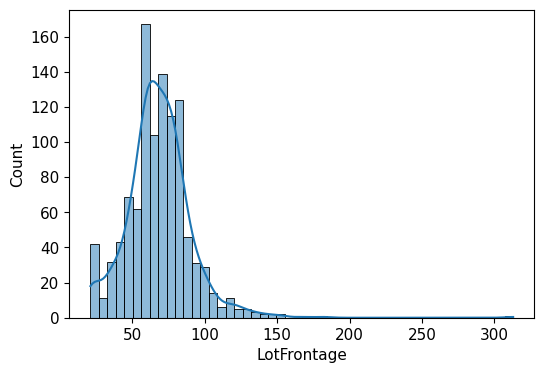

In [33]:
# Plot the distribution of LotFrontage variable.
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='LotFrontage', bins=50, kde=True);

We can see that the LotFrontage distribution is almost normal. So, we will use the mean imputation.

In [34]:
# Mean imputation
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

## Feature Enigineering on Categorical Variables

### Missing Values in Categorical Variables

First, we display all categorical columns with missing values.

In [35]:
series = df[categorical].isnull().sum().sort_values(ascending=False)
series[series>0]

PoolQC          1302
MiscFeature     1258
Alley           1221
Fence           1043
MasVnrType       796
FireplaceQu      645
GarageType        69
GarageCond        69
GarageQual        69
GarageFinish      69
BsmtExposure       1
Electrical         1
dtype: int64

### Techniques to handle missing values in categorical variables

Now, let us think about a strategy, how to handle missing values within categorical variables. Therefore, we can chose between different techniques like

* **Delete the entire columns with missing values**
* **Replace missing values with the most frequent values.**
* **Delete rows with null values.**
* **Predict values using a Classifier Algorithm (supervised or unsupervised).**

There is no one master technique, so we have to decide which technique we will use depending on the given context.

### Delete the entire columns with more than 50% missing values

It is difficult to deal with columns that has a large number of missing values. That's why we delete all columns that contain more than 50% missing values.

In [36]:
# Make a copy of the original dataframe
df_new = df.copy()

# Loop over the categorical columns
for column in categorical:
    
    # Check if the column has more than 50% missing values
    if df[column].isnull().sum() > len(df)/2:
        
        # Drop all columns with more than 50% missing values
        df_new.drop(column, axis=1, inplace=True)

categorical = [column for column in df_new.columns if df_new[column].dtype=='object']

# Display the missing values of the categorical data, after removal
series2 = df_new[categorical].isnull().sum().sort_values(ascending=False)
series2[series2>0]

FireplaceQu     645
GarageCond       69
GarageQual       69
GarageFinish     69
GarageType       69
BsmtExposure      1
Electrical        1
dtype: int64

### Replace Missing Values with the most Frequent Data

In [37]:
# Loop over the categorical columns
for column in categorical:
    
     # Check if the column has more than o and less than 100 missing values
    if (df_new[column].isnull().sum()> 0) and (df_new[column].isnull().sum()< 100):
        
        # Replace missing values by the most frequent data
        replace_mode = df_new[column].mode()[0]
        df_new[column].fillna(replace_mode, inplace=True)

# Display the missing values of the categorical data, after removal
series3 = df_new[categorical].isnull().sum().sort_values(ascending=False)
series3[series3>0]

FireplaceQu    645
dtype: int64

## Predict the Remaining Missing Values with the Random Forest Classifier

Predicting the remaining missing values with the RandomForestClassifier "will give us the opportunity not to waste a good chunk of the dataset, and thus a large amount of information". On the other hand this technique is extensive.

### One-Hot Encoding for Categorical Variables

Since we are dealing with categorical variables, we have to do a one hot encoding for this variables first.

A question that is related to the introduction of dummy variables, is how many new columns we would create. Because raising up the number of columns, had an impact on the time our machine learning algorithm would take. So we first caculate the potential number new columns we would create.

In [38]:
new_columns =  sum([len(df_new[column].unique()) for column in categorical])

print(f'We will have {new_columns} new columns, if we introduce dummie variables.')

We will have 228 new columns, if we introduce dummie variables.


That seems to be an accaptable number.

In [39]:
# For one hot encoding, we need to drop the FireplaceQu variable
df_no_fireplace = df_new.drop('FireplaceQu', axis=1)

# Split the dataframe in numeric and categorical columns
df_no_fireplace_object = df_no_fireplace.select_dtypes(include='object')

# Pick the categorical columns
df_no_fireplace_numeric = df_no_fireplace.select_dtypes(exclude='object')

# Generate dummie variables for the categorical columns
df_dummies = pd.get_dummies(df_no_fireplace_object, drop_first=True)

# Concatenate the numeric columns with the dummie variables
df_dummies= pd.concat([df_no_fireplace_numeric, df_dummies], axis=1)

df_dummies['FireplaceQu'] =  df_new['FireplaceQu']

### Splitting  the Dataframe between Nan and Not-Nan Values

We split the dataframe into two parts along axis 0. The first part called df_new_with_fire contains all rows, where the 'FireplaceQu' is not nan, whereas the second part called df_new_wihout_fire contains all rows, where the 'FireplaceQu' is nan. 

In [40]:
df_new_with_fire = df_dummies[df_dummies['FireplaceQu'].notna()]
df_new_wihout_fire = df_dummies[df_dummies['FireplaceQu'].isnull()]
X_miss = df_new_wihout_fire.drop('FireplaceQu', axis=1)

In [41]:
### Train | Test Split

# Create a feature variable and a label variable
X = df_new_with_fire.drop('FireplaceQu', axis=1)
y = df_new_with_fire['FireplaceQu']

# Use sklearn to split the data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Create a RFC model
random_forest_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=False) 
random_forest_model.fit(X_train, y_train)

# Predict the values of the FireplaceQu variable
y_pred_train = random_forest_model.predict(X_test)
y_pred = random_forest_model.predict(X_miss)

print(f'We obtain an accuracy score of {accuracy_score(y_pred_train, y_test)}')

We obtain an accuracy score of 0.6605504587155964


We obtain an accuracy score of 0.66, which is admittedly not the best result. However, our goal is to apply the technique to predict the remaining missing values, rather than optimizing our model for the highest accuracy.

In [42]:
# Get the indices of missing values for the fireplace variable
index_fireplace = df_new_with_fire.columns.get_loc("FireplaceQu")

X_miss.insert(index_fireplace, "FireplaceQu", y_pred)

# Now, we are ready to replace the missing values withhin the FireplaceQu column.
df_final = pd.concat([df_new_with_fire, X_miss], axis=0)

Now, we are ready to replace the missing values withhin the FireplaceQu column.

In [43]:
df_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,True,False,TA
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,True,False,TA
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,False,False,False,False,False,Gd
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,True,False,TA
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,False,False,False,True,False,False,False,True,False,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,False,False,False,True,False,False,False,True,False,TA
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,False,False,False,True,False,False,False,False,False,Gd
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,False,False,False,True,False,False,False,True,False,Gd
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,True,False,Gd


As we can see the column FireplaceQu is still categorical, so we have to do one hot encoding for one more time.

In [44]:
fireplace_encoded = pd.get_dummies(df_final['FireplaceQu'], drop_first=True)

df_final = pd.concat([df_final.drop('FireplaceQu', axis=1),fireplace_encoded], axis=1 ) 

# Train | Test Split and Scaling

### Creating the Final Dataframe

In [45]:
# Create a feature variable and a label variable
X = df_final.drop('SalePrice', axis=1)
y = df_final["SalePrice"]

# Use sklearn to split the data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()

# Use scale the data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Build Machine Learning Models

At this point, we are finally ready to build different machine learning models capable of predicting our SalePrice based on the given features. The algorithms we are taking into account for model building are:
* **Regression based on K-Nearest Neighbors**
* **Support Vector Regression**
* **Random Forest Regressor**
* **AdaBoost Regressor**

In [46]:
# Initialize variables to store the MSE and RMSE
listMAE = []
listRMSE = []

def printErrorMetrics(test_error_rates_mae, test_error_rates_mse,test_error_rates_rmse):
    """
    Function that prints the results of the error metrics.
    """
    print(f'Minimal Test-Error for different metrics: \n')
    
    # Mean Absolut Error
    print(f'  Mean Absolut Error: {test_error_rates_mae} \n')

    # Store the MAE
    listMAE.append(test_error_rates_mae)

    # Mean Squared Error
    print(f'  Mean Squared Error: {test_error_rates_mse} \n')

    # Root Mean Squared Error
    print(f'  Root Mean Squared Error: {test_error_rates_rmse} \n')

    # Store the RMSE
    listRMSE.append(test_error_rates_rmse)

### Regression based on K-Nearest Neighbors

In this section we choose Regression based on K-Nearest Neighbor, to create our Machine Learning Model.

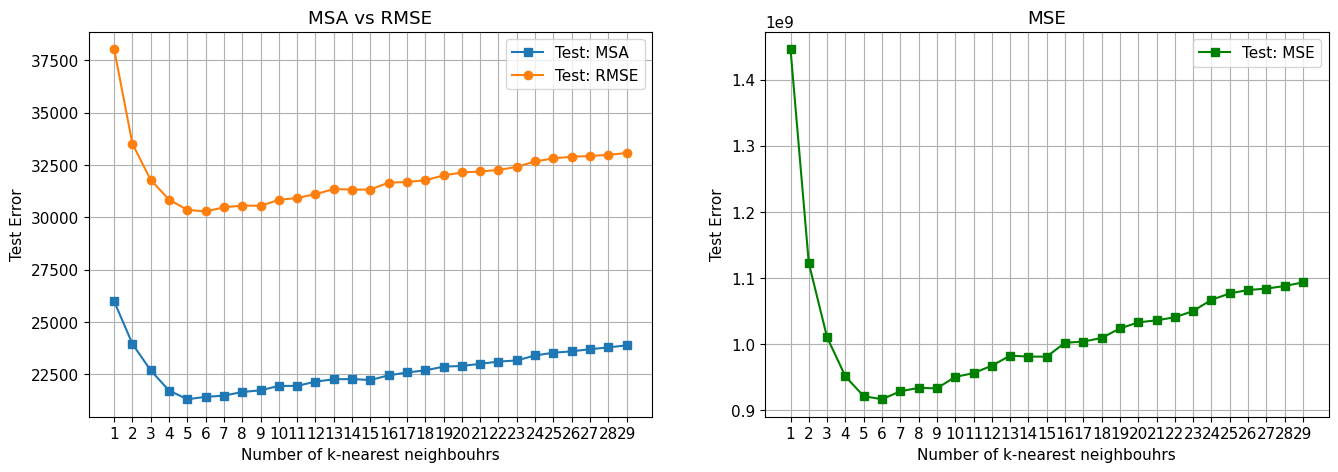

Minimal Test-Error for different metrics: 

  Mean Absolut Error: 21318.16071428571 

  Mean Squared Error: 916989759.9472789 

  Root Mean Squared Error: 30281.838780815124 



In [47]:
### Use an ellbow method, to determine the best number of nearest neighbors for each metric

# Initialize the losses for the metrics
test_error_rates_mae = []  # Results for the MAE
test_error_rates_mse = []  # Results for the MSE
test_error_rates_rmse = [] # Results for the RMSE
number_n = []  # Results for the RMSE

# Loop over the the number nearest neighnors
for n in range(1,30):
    clf = KNeighborsRegressor(n_neighbors=n)
    clf.fit(scaled_X_train, y_train) 
    
    preds = clf.predict(scaled_X_test)
    
    # Compute the MAE error
    err_mae = mean_absolute_error(y_test,preds)
    test_error_rates_mae.append(err_mae)
    
     # Compute the MSE error
    err_mse = mean_squared_error(y_test,preds)
    test_error_rates_mse.append(err_mse)
    
    # Compute the RMSE error
    err_rmse = np.sqrt(err_mse)
    test_error_rates_rmse.append(err_rmse)
    
    number_n.append(n)

    
# Plot the results

fig, ax = plt.subplots(1,2,figsize=(16,5))

# Plot MSA and RMSE
ax[0].plot(number_n , test_error_rates_mae, marker='s', label='Test: MSA')
ax[0].plot(number_n, test_error_rates_rmse, marker='o', label='Test: RMSE')
ax[0].set_xticks(range(1,30))
ax[0].grid(True)
ax[0].set_title('MSA vs RMSE')
ax[0].set_xlabel('Number of k-nearest neighbouhrs')
ax[0].set_ylabel('Test Error')
ax[0].legend()

# Plot MSE in another graphic, since MSE need a different range for its y-values
ax[1].plot(number_n, test_error_rates_mse,marker='s', label='Test: MSE', color='g')
ax[1].set_xticks(range(1,30))
ax[1].grid(True)
ax[1].set_title('MSE')
ax[1].set_ylabel('Test Error')
ax[1].set_xlabel('Number of k-nearest neighbouhrs')
ax[1].legend()

plt.show()

# Print the best results for each metric
printErrorMetrics(min(test_error_rates_mae), min(test_error_rates_mse), min(test_error_rates_rmse))

### Support Vector Regression

In this section we choose Support Vector Regression, to create our Machine Learning Model.

Since we are using Support Vector Regression we have a bunch of hyperparameters at our disposal, which we can adjust in order to recieve a better performace. Among those hyperparameters are the following:
* **Regularization parameter C**
* **Kernel: linear, poly, rbf, sigmoid**
* **Gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.**
* **Degree: Degree of the polynomial kernel function (‘poly’).**
* **Epsilon: Epsilon in the epsilon-SVR model.**

For investing the good (not necessserally best!) combination of hyyperparameters we create a grid of hyper-parameters using the GridSearchCV built-in functionality provided by Scikit-Learn.

In [48]:
# Defining parameter range
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 
             'gamma':['scale', 'auto'], 'degree': [2, 3, 4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2 ]}

# Create a SVR model
svr = SVR()

# Perform a grid search on that model to find the optimal parameters
grid = GridSearchCV(svr,param_grid)

grid.fit(scaled_X_train, y_train)

# Print the best parameters according to our grid search
print(f'The best grid parameters are: {grid.best_params_} \n \n')

# Make a prediction based on the best parameters
grid_preds = grid.predict(scaled_X_test)

### Now, let's test our predictions on some error metrics.
mae = mean_absolute_error(y_test, grid_preds)
mse = mean_squared_error(y_test, grid_preds)
rmse = np.sqrt(mean_squared_error(y_test, grid_preds))

# Print the best results for each metric
printErrorMetrics(mae , mse, rmse)

The best grid parameters are: {'C': 100, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'} 
 

Minimal Test-Error for different metrics: 

  Mean Absolut Error: 14086.247307963375 

  Mean Squared Error: 387547658.3232789 

  Root Mean Squared Error: 19686.230170433315 



## Random Forest Regressor

In [50]:
# Defining parameter range
param_grid = {'n_estimators': list(np.arange(100,101,1))} #'max_depth':[13, 14, 15, 20]}

# Create a RFR model
rfr = RandomForestRegressor(random_state=0)

# Do a grid search on that model for finding the best parameters
grid = GridSearchCV(rfr, param_grid)
grid.fit(scaled_X_train, y_train)
grid_preds = grid.predict(scaled_X_test)

# Print the best parameters according to our grid search
print(f'The best grid parameters are: {grid.best_params_} \n \n')

mae = mean_absolute_error(y_test, grid_preds)
mse = mean_squared_error(y_test, grid_preds)
rmse = np.sqrt(mean_squared_error(y_test, grid_preds))

### Now, let's test our predictions on some error metrics.

# Print the best results for each metric
printErrorMetrics(mae , mse, rmse)

The best grid parameters are: {'n_estimators': 100} 
 

Minimal Test-Error for different metrics: 

  Mean Absolut Error: 16879.646403061226 

  Mean Squared Error: 543532874.5079385 

  Root Mean Squared Error: 23313.791508631504 



## Ada Boost Regressor

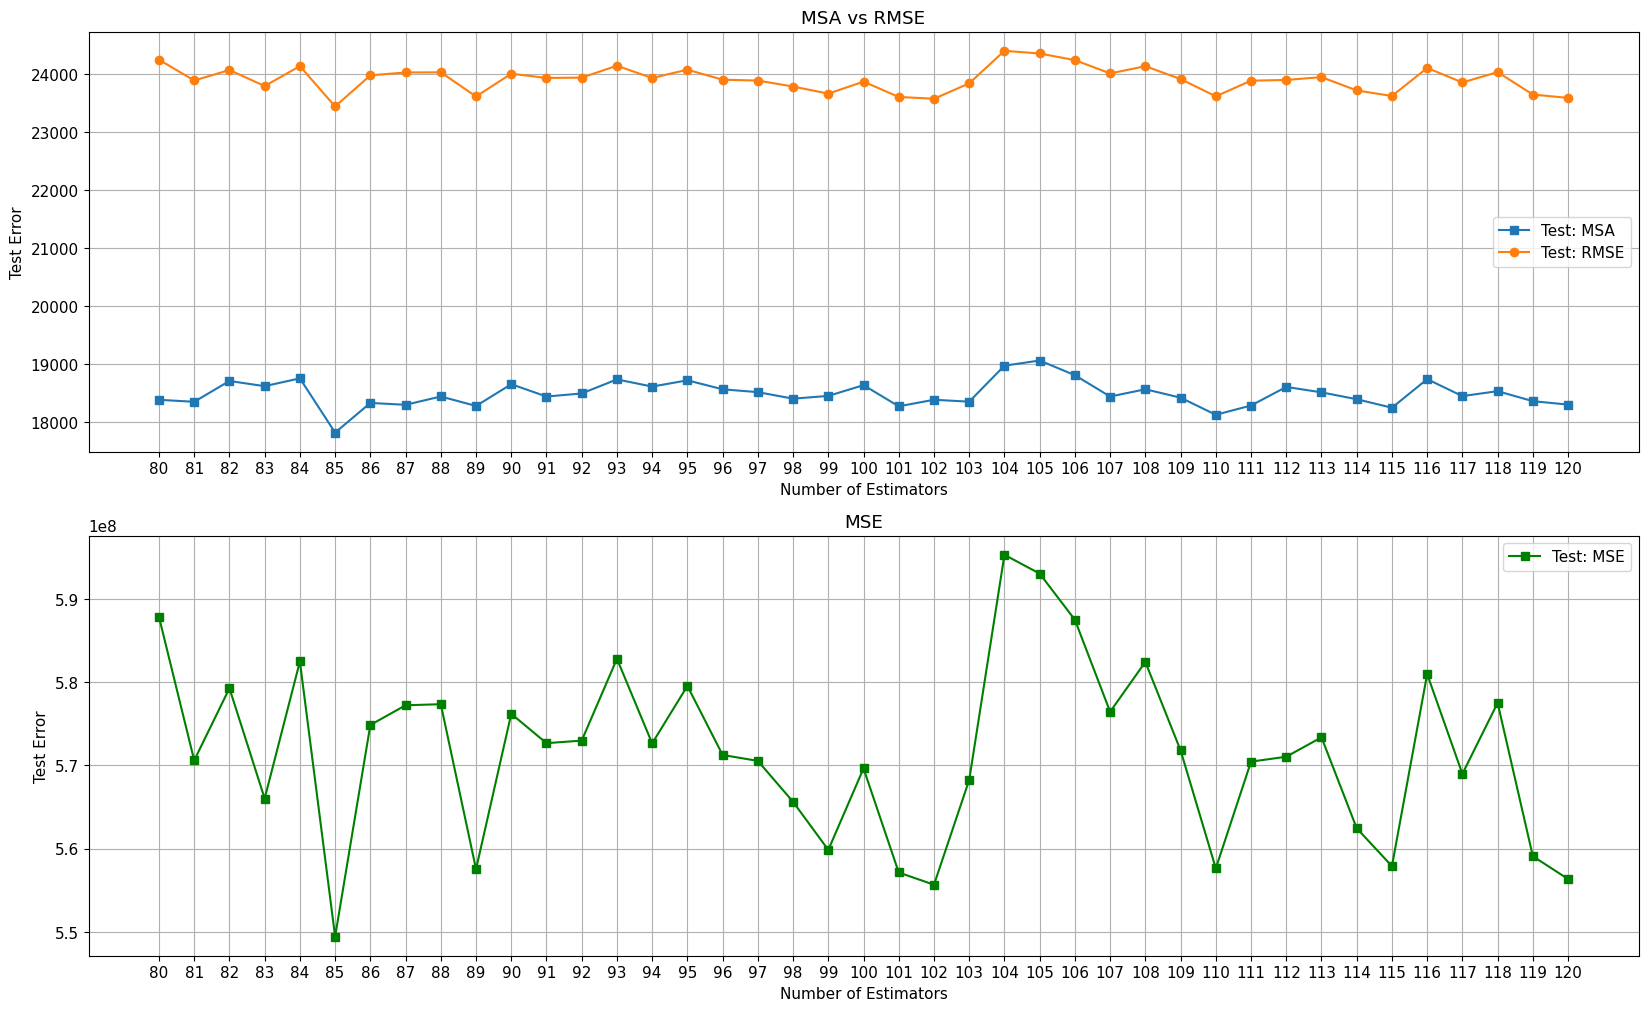

Minimal Test-Error for different metrics: 

  Mean Absolut Error: 17821.746301594467 

  Mean Squared Error: 549451409.7760861 

  Root Mean Squared Error: 23440.37989828847 



In [55]:
# Initialize the losses for the metrics
test_error_rates_mae = []  # Results for the MAE
test_error_rates_mse = []  # Results for the MSE
test_error_rates_rmse = [] # Results for the RMSE
number_n = []  # Results for the RMSE


for n in range(80,121):
    abr = AdaBoostRegressor(n_estimators=n)
    abr.fit(X_train, y_train)
    preds = abr.predict(X_test)
    
 # Compute the MAE error
    err_mae = mean_absolute_error(y_test,preds)
    test_error_rates_mae.append(err_mae)
    
     # Compute the MSE error
    err_mse = mean_squared_error(y_test,preds)
    test_error_rates_mse.append(err_mse)
    
    # Compute the RMSE error
    err_rmse = np.sqrt(err_mse)
    test_error_rates_rmse.append(err_rmse)
    
    number_n.append(n)
    
# Plot the results
fig, ax = plt.subplots(2,1,figsize=(20,12))

# Plot MSA and RMSE
ax[0].plot(number_n , test_error_rates_mae, marker='s', label='Test: MSA')
ax[0].plot(number_n, test_error_rates_rmse, marker='o', label='Test: RMSE')
ax[0].set_xticks(range(80,121))
ax[0].grid(True)
ax[0].set_title('MSA vs RMSE')
ax[0].set_xlabel('Number of Estimators')
ax[0].set_ylabel('Test Error')
ax[0].legend()

# Plot MSE in another graphic, since MSE need a different range for its y-values
ax[1].plot(number_n, test_error_rates_mse,marker='s', label='Test: MSE', color='g')
ax[1].set_xticks(range(80,121))
ax[1].grid(True)
ax[1].set_title('MSE')
ax[1].set_ylabel('Test Error')
ax[1].set_xlabel('Number of Estimators')
ax[1].legend()

plt.show()

# Print the best results for each metric
printErrorMetrics(min(test_error_rates_mae), min(test_error_rates_mse), min(test_error_rates_rmse))

# Comparing Models and Conclusions

### Comparing Models Performance

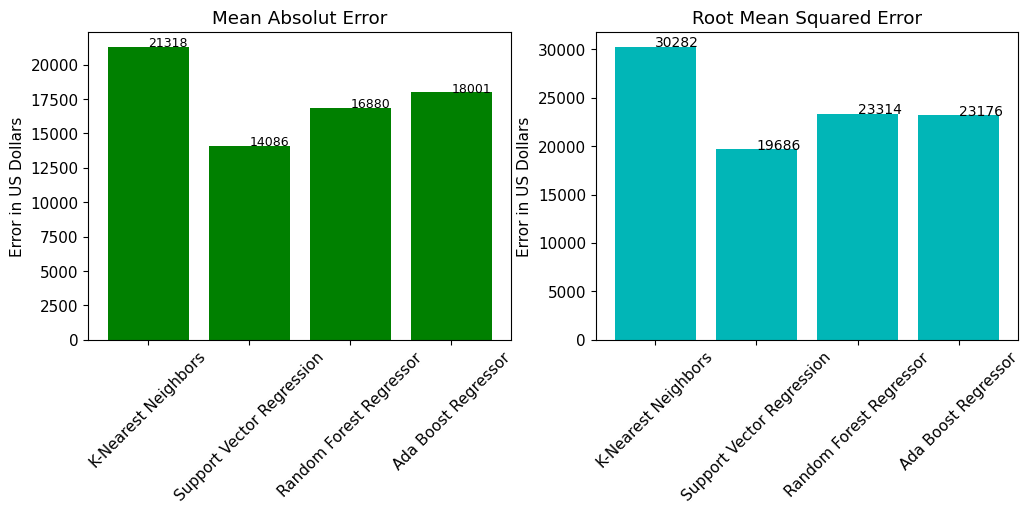

In [52]:
# Making a plot to compare the model accrding to the used metrics
fig, ax = plt.subplots(1,2, figsize=(12,4))


labels = ['K-Nearest Neighbors','Support Vector Regression', 'Random Forest Regressor', 'Ada Boost Regressor']
colors = ['green','#01B6B7']

# Plot the MSE
ax[0].set_xticklabels(labels, rotation=45)
ax[0].bar(labels,listMAE, color= colors[0])
ax[0].set_title('Mean Absolut Error')
ax[0].set_ylabel('Error in US Dollars')

# Dispay the value for the error metric on top of the bar
for index,data in enumerate(listMAE):
    ax[0].text(x=index , y =data+1 , s=f"{data:.0f}" , fontdict=dict(fontsize=9))


# Plot the RMSE
ax[1].set_xticklabels(labels, rotation=45)
ax[1].bar(labels , listRMSE, color=colors[1])
ax[1].set_title('Root Mean Squared Error')
ax[1].set_ylabel('Error in US Dollars')

# Dispay the value for the error metric on top of the bar
for index,data in enumerate(listRMSE):
    ax[1].text(x=index , y =data+1 , s=f"{data:.0f}" , fontdict=dict(fontsize=10))


plt.show()

### Conclusions

In this context, a reasonable choice for an error metric is the root mean squared error (RMSE). Since we are dealing with house prices, it is normal to have predictions that differ significantly from the ground truth. That's why we prefer the root mean squared error to the mean squared error (MSE), as the latter heavily penalizes larger differences between predictions and ground truth. Additionally, we can observe that the support vector regressor (SVR) model provides the best result and is therefore a reasonable choice for predicting house prices.

Looking at house pricing prediction, RMSE essentially shows what is the average deviation in our model predicted house prices from the target values (the prices the houses are sold for). 

In [54]:
# Compute mean house price
meanHousePrice = df_final["SalePrice"].mean()


# Compute RMSE for the SVR model
RMSE = listRMSE[1]

# Compute the model deviation in %
modelDeviation = 100*(RMSE / meanHousePrice )

print(f'For the SVR model we obtain the following results: \n')
print(f'  Mean House Price: {meanHousePrice:.2f}')
print(f'  Root Mean Squared Error: {RMSE:.2f}')
print(f'  Model Deviation: {modelDeviation:.2f}%')

For the SVR model we obtain the following results: 

  Mean House Price: 169949.22
  Root Mean Squared Error: 19686.23
  Model Deviation: 11.58%


We see, that we have a deviation of 19686.23 Dollar. Recalling that mean house price was 169949.22 Dollar deviation of our model prediction is 11.58%.

# References

https://www.kaggle.com/code/prashant111/a-reference-guide-to-feature-engineering-methods

https://medium.com/analytics-vidhya/handle-missing-values-in-categorical-features-b7c5b073dda2

https://medium.com/towards-data-science/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce